# Segunda lista de visão computacional

## Lucas Heron Santos Anchieta
## Ruan Tenório de Melo

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

### 1. Na documentação da OpenCV é possível encontrar diversos detectores e descritores. Usando um conjunto com pelo menos 6 imagens (você pode tirar fotos com seu telefone, por exemplo), experimente três detectores distintos nestas imagens, incluindo o detector de Harris. Pesquise e descreva resumidamente com suas palavras (até 200 palavras para cada) como cada um funciona, incluindo seus parâmetros e quais suas principais diferenças. Exiba resultados nas suas imagens, e em quais situações cada um funciona bem ou mal. Discuta seus parâmetros. Qual deles você achou melhor? Justifique.

#### Detector de Harris

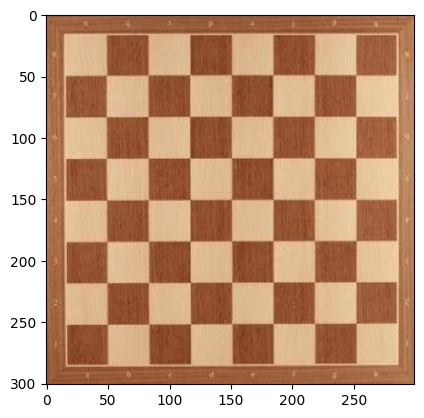

In [77]:
img = cv.imread('img/brown_chess_board.webp')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

In [78]:
def harris_detect(img):
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    gray = np.float32(gray)

    dst = cv.cornerHarris(gray, 2, 3, 0.04)

    dst = cv.dilate(dst,None)

    return dst

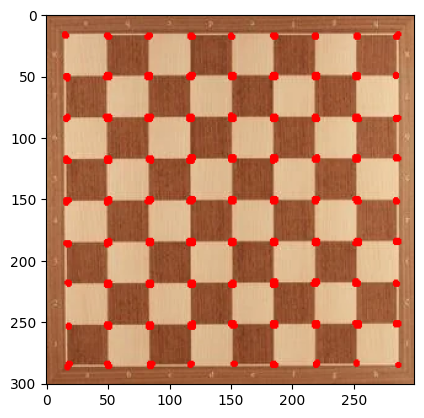

In [79]:
dst = harris_detect(img)

thresh = 0.1*dst.max()

corner_img = np.copy(img)

# Iterate through all the corners and draw them on the img (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # img, center pt, radius, color, thickness
            cv.circle( corner_img, (i, j), 1, (255,0,0), 1)

plt.imshow(corner_img)

#### Detector FAST

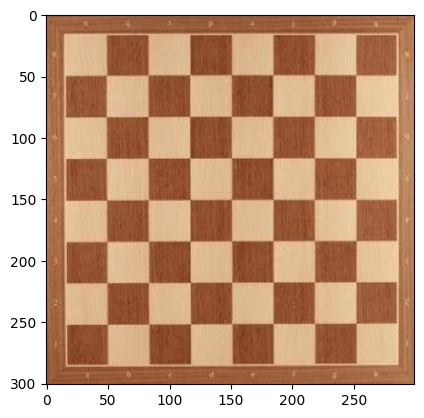

In [80]:
plt.imshow(img)

In [81]:
def fast_detect_nonmax(img):

    img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    fast = cv.FastFeatureDetector_create()

    kp = fast.detect(img_gray,None)
    dst = cv.drawKeypoints(img, kp, None, color=(255,0,0))
    print( "Threshold: {}".format(fast.getThreshold()) )
    print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
    print( "neighborhood: {}".format(fast.getType()) )
    print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)))

    return dst

In [82]:
def fast_detect_without_nonmax(img):

    img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    
    fast = cv.FastFeatureDetector_create()

    fast.setNonmaxSuppression(0)
    kp = fast.detect(img_gray, None)
    print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
    dst = cv.drawKeypoints(img, kp, None, color=(255,0,0))

    return dst

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 921


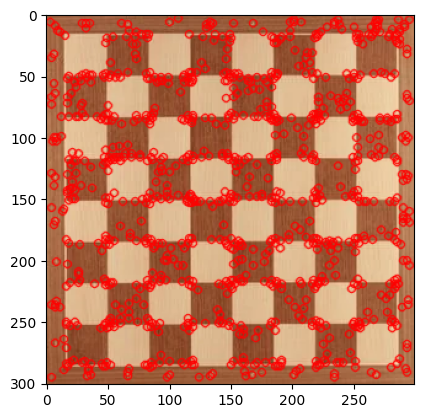

In [83]:
plt.imshow(fast_detect_nonmax(img))

Total Keypoints without nonmaxSuppression: 2640


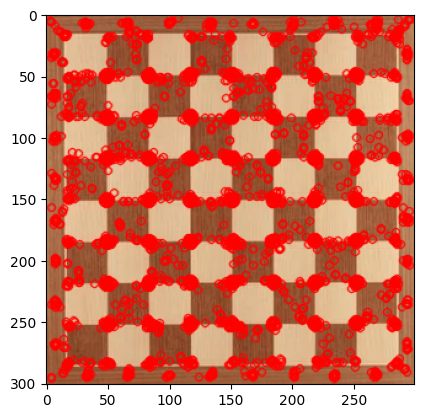

In [84]:
plt.imshow(fast_detect_without_nonmax(img))

#### Detector Shi-Tomasi

In [85]:
def shi_tomasi_detect(img):
    img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    img_copy = np.copy(img)
    corners = cv.goodFeaturesToTrack(img_gray,81,0.01,10)
    corners = np.int32(corners)

    for i in corners:
        x,y = i.ravel()
        cv.circle(img_copy,(x,y),3,255,-1)

    return img_copy

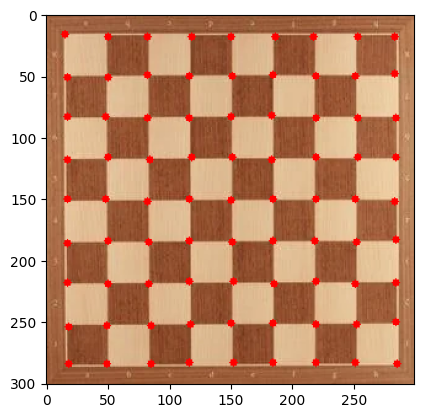

In [95]:
plt.imshow(shi_tomasi_detect(img))

#### 2. Repita o mesmo procedimento acima para 3 tipos de descritores, incluindo o SIFT, e escolha um algoritmo de geração de correspondências (matching).

#### 3. Considere o seguinte problema: Dada uma base de imagens de rótulos de produtos, crie um algoritmo que identifique, a partir de uma imagem de um produto (onde o rótulo apareça), qual é o produto que aparece na foto.

##### a) Crie uma base com pelo menos 10 rótulos de produto.

##### b) Escolha e descreva uma metodologia completa para geração de correspondências, baseada na questão anterior.

##### c) Adapte a metodologia escolhida para resolver o problema, e experimente em pelo menos 5 fotos de produtos da base (diferentes das fotos da base de rótulos).

#### 4. Aplique o filtro LoG em pelo menos 6 escalas distintas (você pode usar a OpenCV). Em seguida, implemente um algoritmo que determina se um pixel (x, y, s) é um máximo local no espaço de posição-escala. Aplique este algoritmo em todos os pixels das imagens resultantes para encontrar estes extremos, e pinte estes pixels de uma cor diferente. Exiba as imagens resultantes. Obs.: você não precisa aplicar na imagem de menor e maior escala, nem nos pixels do bordo da imagem, visto que eles não tem uma vizinhança completa.